In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

min_wage_df = pd.read_csv('Minimum Wage Data.csv', encoding='latin1')
unemployment_df = pd.read_csv('Unemployment in America Per US State.csv', encoding='latin1')

unemployment_df.rename(columns={'State/Area': 'State'}, inplace=True)

merged_df = pd.merge(min_wage_df, unemployment_df, on=['Year', 'State'], how='inner')

numerical_columns = [
    'Total Civilian Non-Institutional Population in State/Area',
    'Total Civilian Labor Force in State/Area',
    'Total Employment in State/Area',
    'Total Unemployment in State/Area'
]

for col in numerical_columns:
    merged_df[col] = merged_df[col].str.replace(',', '').astype(float)


merged_df.drop(columns=['Footnote'], inplace=True)


selected_columns = [
    'Year', 'State', 'State.Minimum.Wage', 'State.Minimum.Wage.2020.Dollars',
    'Federal.Minimum.Wage', 'Federal.Minimum.Wage.2020.Dollars', 
    'Effective.Minimum.Wage', 'Effective.Minimum.Wage.2020.Dollars', 
    'CPI.Average', 'FIPS Code', 'Month',
    'Total Civilian Non-Institutional Population in State/Area',
    'Total Civilian Labor Force in State/Area', 
    'Total Employment in State/Area', 
    'Total Unemployment in State/Area',
    'Percent (%) of Labor Force Unemployed in State/Area'
]

cleaned_df = merged_df[selected_columns]

print(cleaned_df.head())

print("\nSummary Statistics:")
print(cleaned_df.describe())

print("\nMissing Values:")
print(cleaned_df.isnull().sum())



   Year    State  State.Minimum.Wage  State.Minimum.Wage.2020.Dollars  \
0  1976  Alabama                 0.0                              0.0   
1  1976  Alabama                 0.0                              0.0   
2  1976  Alabama                 0.0                              0.0   
3  1976  Alabama                 0.0                              0.0   
4  1976  Alabama                 0.0                              0.0   

   Federal.Minimum.Wage  Federal.Minimum.Wage.2020.Dollars  \
0                   2.2                               10.0   
1                   2.2                               10.0   
2                   2.2                               10.0   
3                   2.2                               10.0   
4                   2.2                               10.0   

   Effective.Minimum.Wage  Effective.Minimum.Wage.2020.Dollars  CPI.Average  \
0                     2.2                                 10.0         56.9   
1                     2.2     

In [9]:

cleaned_df = pd.read_csv('Cleaned_Merged_Dataset.csv')

aggregated_df = cleaned_df.groupby(['Year', 'State'], as_index=False).agg({
    'State.Minimum.Wage': 'first',
    'State.Minimum.Wage.2020.Dollars': 'first',
    'Federal.Minimum.Wage': 'first',
    'Federal.Minimum.Wage.2020.Dollars': 'first',
    'Effective.Minimum.Wage': 'first',
    'Effective.Minimum.Wage.2020.Dollars': 'first',
    'CPI.Average': 'first',
    'FIPS Code': 'first',
    'Total Civilian Non-Institutional Population in State/Area': 'mean',
    'Total Civilian Labor Force in State/Area': 'mean',
    'Total Employment in State/Area': 'mean',
    'Total Unemployment in State/Area': 'mean',
    'Percent (%) of Labor Force Unemployed in State/Area': 'mean'
})


aggregated_df.to_csv('Aggregated_Cleaned_Merged_Dataset.csv', index=False)


C:\Users\wangy\AppData\Local\Temp\ipykernel_79296\2588171149.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=aggregated_df_no_fips, x='Year', y='State.Minimum.Wage', hue='State', ci=None, legend=None)


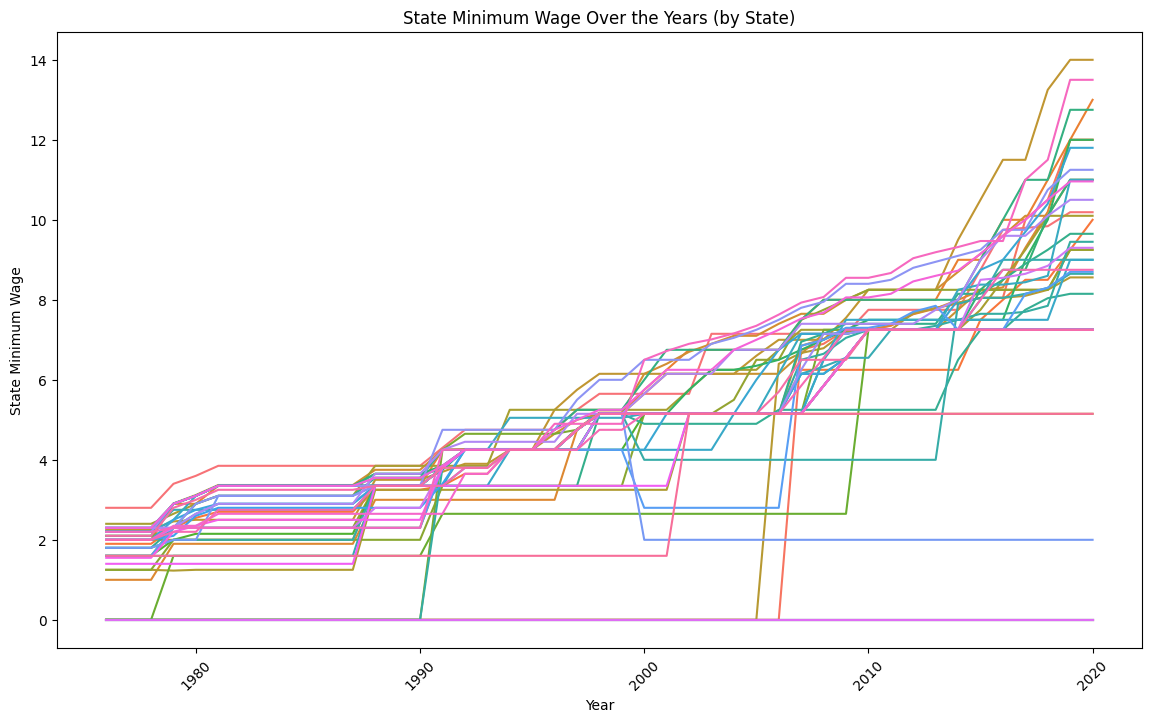

C:\Users\wangy\AppData\Local\Temp\ipykernel_79296\2588171149.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=aggregated_df_no_fips, x='Year', y='Federal.Minimum.Wage.2020.Dollars', ci=None)


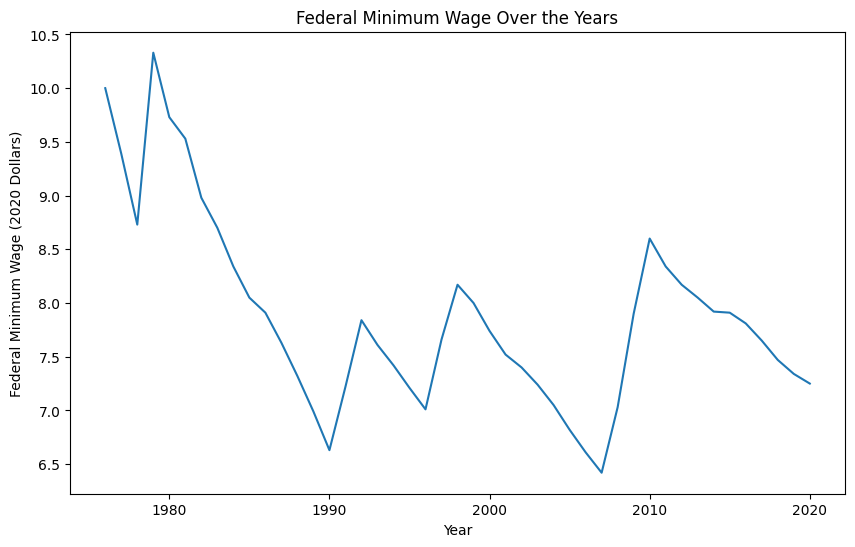

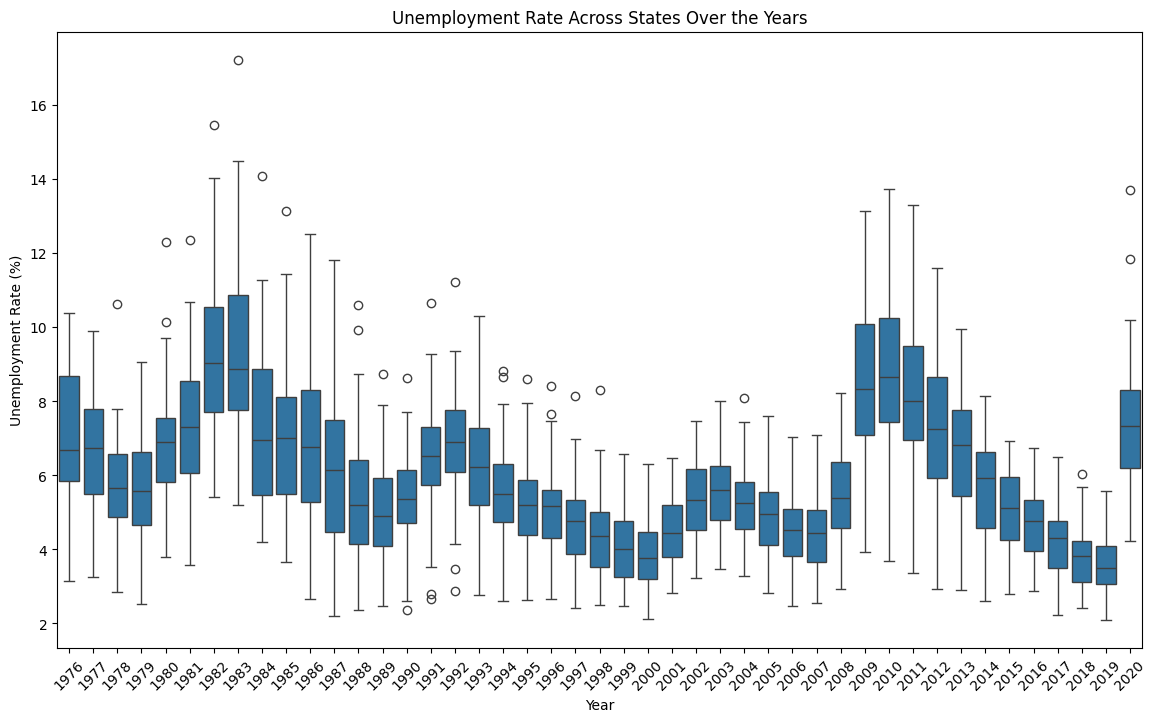

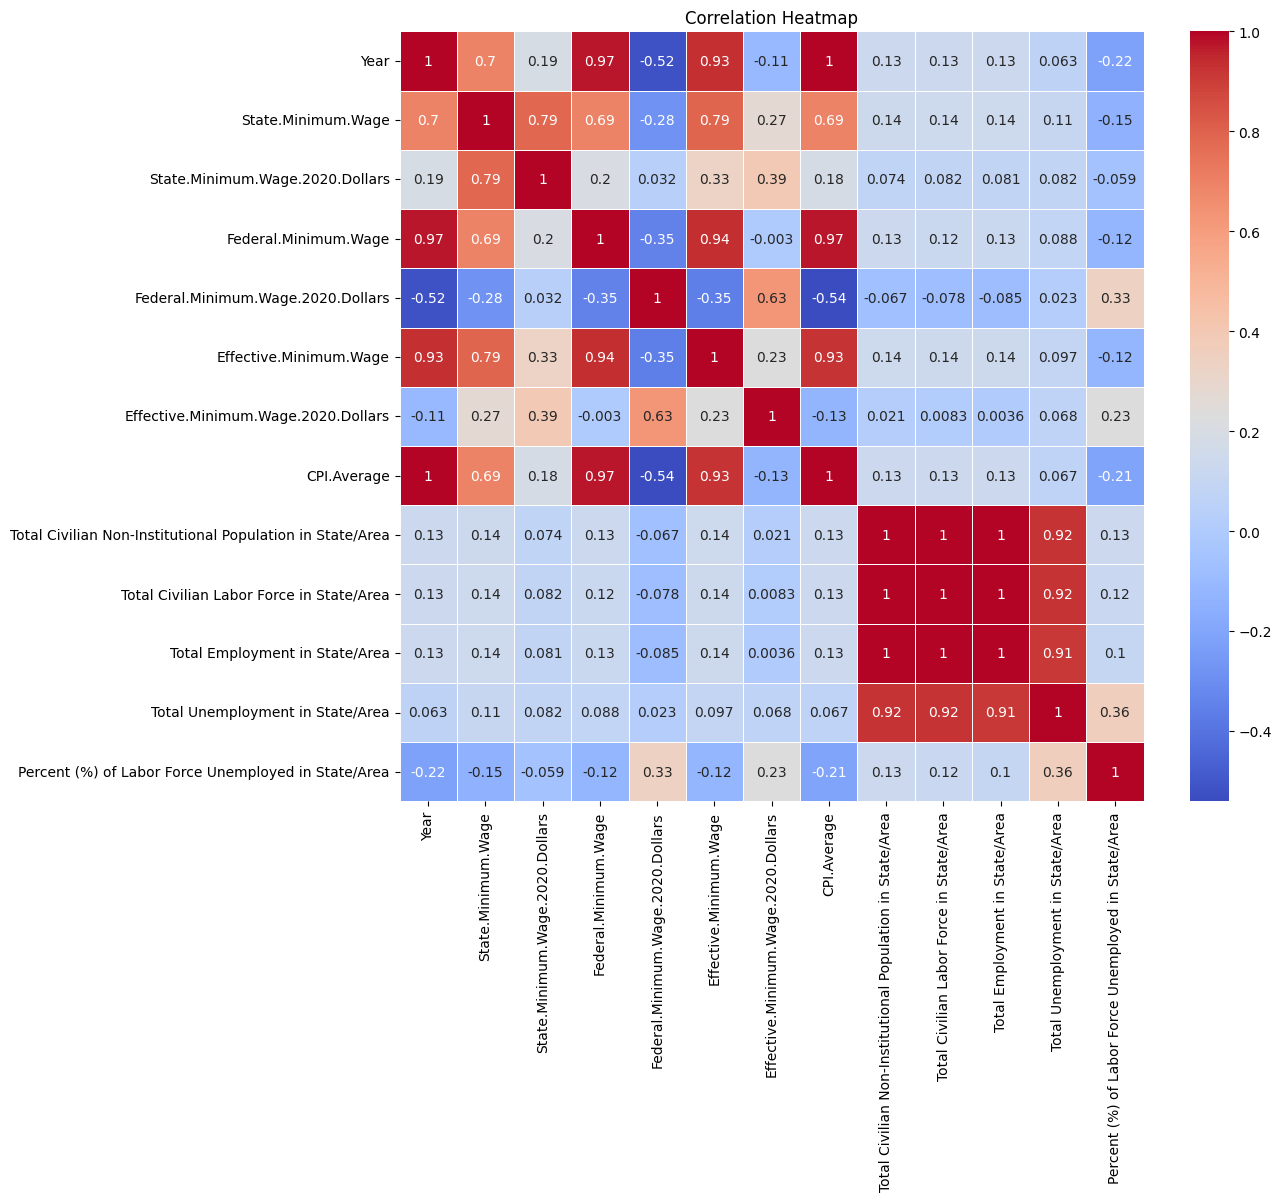

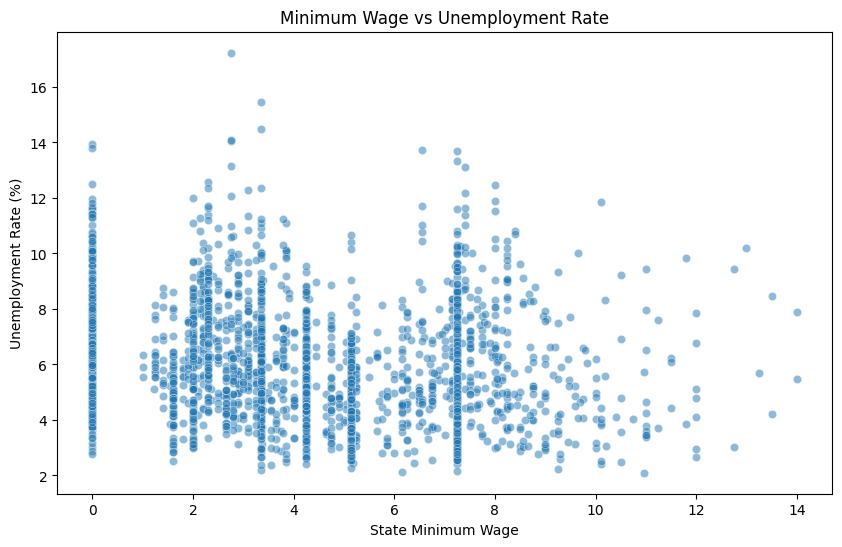

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


aggregated_df_no_fips = aggregated_df.drop(columns=['FIPS Code'])


aggregated_df_no_fips.to_csv('Aggregated_Cleaned_Merged_Dataset_No_FIPS.csv', index=False)

aggregated_df_no_fips = pd.read_csv('Aggregated_Cleaned_Merged_Dataset_No_FIPS.csv')

plt.figure(figsize=(14, 8))
sns.lineplot(data=aggregated_df_no_fips, x='Year', y='State.Minimum.Wage', hue='State', ci=None, legend=None)
plt.title('State Minimum Wage Over the Years (by State)')
plt.xlabel('Year')
plt.ylabel('State Minimum Wage')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregated_df_no_fips, x='Year', y='Federal.Minimum.Wage.2020.Dollars', ci=None)
plt.title('Federal Minimum Wage Over the Years')
plt.xlabel('Year')
plt.ylabel('Federal Minimum Wage (2020 Dollars)')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=aggregated_df_no_fips, x='Year', y='Percent (%) of Labor Force Unemployed in State/Area')
plt.title('Unemployment Rate Across States Over the Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 10))
corr_matrix = aggregated_df_no_fips.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=aggregated_df_no_fips, x='State.Minimum.Wage', y='Percent (%) of Labor Force Unemployed in State/Area', alpha=0.5)
plt.title('Minimum Wage vs Unemployment Rate')
plt.xlabel('State Minimum Wage')
plt.ylabel('Unemployment Rate (%)')
plt.show()
